In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from scipy import stats

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Ice Melting/GLIMS_Full_Dataset.csv")

<ipython-input-2-05959ddc915b>:1: DtypeWarning: Columns (10,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/content/drive/MyDrive/Ice Melting/GLIMS_Full_Dataset.csv")


In [ ]:
len(dataset)

1186805

In [ ]:
dataset.head()

,system:index,analysts,anlys_id,anlys_time,area,chief_affl,conn_lvl,db_area,geog_area,glac_id,...,release_dt,rgi_gl_typ,src_date,subm_id,submitters,surge_type,term_type,wgms_id,width,.geo
0,000000000000000002df,"Antoine, Rabatel",508852,2016-09-01T00:00:00,0.0,Laboratoire de Glaciologie et G�ophysique de l...,0,0.039315,French Alps,G006352E44818N,...,2016-07-05T09:00:00,NaN,1967-01-01T00:00:00,641,"Rabatel, Antoine",0,9,F4N01083A??,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.351093133..."
1,000000000000000002e1,"Antoine, Rabatel",508853,2016-09-01T00:00:00,0.0,Laboratoire de Glaciologie et G�ophysique de l...,0,0.281235,French Alps,G006353E44824N,...,2016-07-05T09:00:00,NaN,1967-01-01T00:00:00,641,"Rabatel, Antoine",0,9,F4N01083A10,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.347851420..."
2,000000000000000002e3,"Antoine, Rabatel",508844,2016-09-01T00:00:00,0.0,Laboratoire de Glaciologie et G�ophysique de l...,0,0.443637,French Alps,G006348E44814N,...,2016-07-05T09:00:00,NaN,1967-01-01T00:00:00,641,"Rabatel, Antoine",0,9,F4N01083A09,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.344997569..."
3,00000000000000000304,"Antoine, Rabatel",508864,2016-09-01T00:00:00,0.0,Laboratoire de Glaciologie et G�ophysique de l...,0,0.098862,French Alps,G006363E44824N,...,2016-07-05T09:00:00,NaN,1967-01-01T00:00:00,641,"Rabatel, Antoine",0,9,F4N01083A??,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.355409563..."
4,00000000000000000307,"Antoine, Rabatel",508859,2016-09-01T00:00:00,0.0,Laboratoire de Glaciologie et G�ophysique de l...,0,0.079760,French Alps,G006358E44819N,...,2016-07-05T09:00:00,NaN,1967-01-01T00:00:00,641,"Rabatel, Antoine",0,9,F4N01083A??,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.354713921..."


In [ ]:
dataset.describe()

,anlys_id,area,conn_lvl,db_area,glob_unc_x,glob_unc_y,gtng_o1reg,gtng_o2reg,length,loc_unc_x,...,max_elev,mean_elev,min_elev,primeclass,rc_id,rgi_gl_typ,subm_id,surge_type,term_type,width
count,1.186805e+06,1.186805e+06,1.186805e+06,1.186805e+06,1.186786e+06,1.186786e+06,1.186805e+06,1.186805e+06,1.186805e+06,1.186786e+06,...,1.186805e+06,1.186805e+06,1.186805e+06,1.186805e+06,1.186805e+06,316960.000000,1.186805e+06,1.186805e+06,1.186805e+06,1.186805e+06
mean,5.610386e+05,1.455726e+05,2.101356e-02,9.389582e+01,6.458419e+01,6.430890e+01,1.149493e+01,4.450729e+00,2.978615e+02,4.347916e+01,...,1.826351e+03,8.206258e+02,1.333172e+03,4.771146e-01,3.973284e+02,1927.165485,6.658374e+02,6.211888e-02,8.851234e+00,6.514854e+00
std,2.912425e+05,6.592862e+06,1.871252e-01,4.162588e+02,2.552932e+01,2.578817e+01,5.716527e+00,6.815037e+00,3.079733e+03,1.421907e+01,...,2.261007e+03,1.706535e+03,1.998312e+03,1.577249e+00,3.149903e+02,3591.178800,9.656796e+01,4.058873e-01,1.081622e+00,2.565024e+02
min,1.000000e+00,-9.990000e+02,0.000000e+00,-1.112250e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+02,0.000000e+00,...,-9.999000e+03,-9.999000e+03,-9.999000e+03,0.000000e+00,1.000000e+00,19.000000,1.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+02
25%,3.453540e+05,0.000000e+00,0.000000e+00,1.170050e-01,5.000000e+01,5.000000e+01,7.000000e+00,1.000000e+00,0.000000e+00,5.000000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.600000e+01,99.000000,6.020000e+02,0.000000e+00,9.000000e+00,0.000000e+00
50%,4.920140e+05,1.356400e-01,0.000000e+00,6.987500e-01,8.000000e+01,8.000000e+01,1.300000e+01,2.000000e+00,0.000000e+00,5.000000e+01,...,8.590000e+02,0.000000e+00,7.000000e+00,0.000000e+00,5.360000e+02,99.000000,6.380000e+02,0.000000e+00,9.000000e+00,0.000000e+00
75%,8.279710e+05,3.383000e+00,0.000000e+00,1.090280e+01,8.000000e+01,8.000000e+01,1.600000e+01,4.000000e+00,0.000000e+00,5.000000e+01,...,3.374000e+03,7.040000e+02,2.576000e+03,0.000000e+00,7.610000e+02,199.000000,7.520000e+02,0.000000e+00,9.000000e+00,0.000000e+00
max,1.039229e+06,1.660680e+09,2.000000e+00,1.650790e+05,6.500000e+02,1.500000e+02,1.900000e+01,3.100000e+01,1.826250e+05,5.000000e+02,...,6.553500e+04,8.115000e+03,8.047000e+03,1.000000e+01,7.610000e+02,9599.000000,8.210000e+02,3.000000e+00,9.000000e+00,4.000000e+04


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186805 entries, 0 to 1186804
Data columns (total 38 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   system:index  1186805 non-null  object 
 1   analysts      1186805 non-null  object 
 2   anlys_id      1186805 non-null  int64  
 3   anlys_time    1186805 non-null  object 
 4   area          1186805 non-null  float64
 5   chief_affl    1186805 non-null  object 
 6   conn_lvl      1186805 non-null  int64  
 7   db_area       1186805 non-null  float64
 8   geog_area     1186805 non-null  object 
 9   glac_id       1186805 non-null  object 
 10  glac_name     457162 non-null   object 
 11  glac_stat     1186805 non-null  object 
 12  glob_unc_x    1186786 non-null  float64
 13  glob_unc_y    1186786 non-null  float64
 14  gtng_o1reg    1186805 non-null  int64  
 15  gtng_o2reg    1186805 non-null  int64  
 16  length        1186805 non-null  float64
 17  line_type     1186805 non-n

# Drop less important features like ids, unique values, columns with too many null values, etc...


In [ ]:
dataset.drop(columns=['analysts','anlys_id', 'chief_affl', 'glac_id', 'glac_name', 'local_id', 'rc_id', 'rgi_gl_typ', 'subm_id', 'submitters', 'wgms_id'], axis=0, inplace=True)

In [ ]:
dataset.head()

,system:index,anlys_time,area,conn_lvl,db_area,geog_area,glac_stat,glob_unc_x,glob_unc_y,gtng_o1reg,...,min_elev,primeclass,proc_desc,rec_status,release_dt,src_date,surge_type,term_type,width,.geo
0,000000000000000002df,2016-09-01T00:00:00,0.0,0,0.039315,French Alps,gone,80.0,80.0,11,...,3098,0,; The glacier inventory was developed from ort...,okay,2016-07-05T09:00:00,1967-01-01T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.351093133..."
1,000000000000000002e1,2016-09-01T00:00:00,0.0,0,0.281235,French Alps,exists,80.0,80.0,11,...,2535,0,; The glacier inventory was developed from ort...,okay,2016-07-05T09:00:00,1967-01-01T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.347851420..."
2,000000000000000002e3,2016-09-01T00:00:00,0.0,0,0.443637,French Alps,exists,80.0,80.0,11,...,2787,0,; The glacier inventory was developed from ort...,okay,2016-07-05T09:00:00,1967-01-01T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.344997569..."
3,00000000000000000304,2016-09-01T00:00:00,0.0,0,0.098862,French Alps,exists,80.0,80.0,11,...,2385,0,; The glacier inventory was developed from ort...,okay,2016-07-05T09:00:00,1967-01-01T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.355409563..."
4,00000000000000000307,2016-09-01T00:00:00,0.0,0,0.079760,French Alps,exists,80.0,80.0,11,...,2873,0,; The glacier inventory was developed from ort...,okay,2016-07-05T09:00:00,1967-01-01T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.354713921..."


In [ ]:
dataset.isnull().sum()

,0
system:index,0
anlys_time,0
area,0
conn_lvl,0
db_area,0
geog_area,0
glac_stat,0
glob_unc_x,19
glob_unc_y,19
gtng_o1reg,0


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset['glac_stat'].value_counts()

,count
glac_stat,
exists,1186193
gone,593


# Mean area of glaciers over time

In [ ]:
dataset['anlys_time'] = pd.to_datetime(dataset['anlys_time'], errors='coerce')
dataset['year'] = dataset['anlys_time'].dt.year

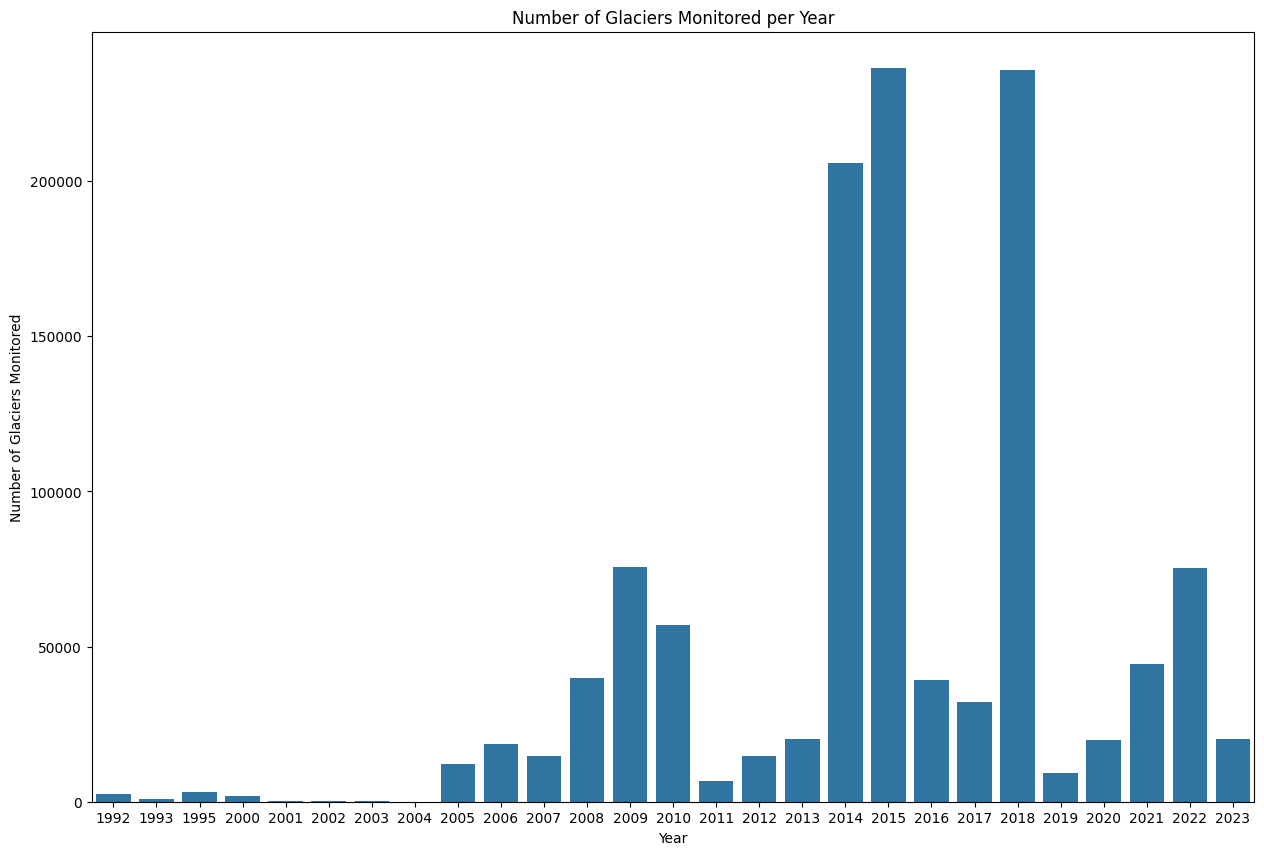

In [ ]:
values_per_year = dataset['year'].value_counts()

plt.figure(figsize=(15, 10))
sns.barplot(x=values_per_year.index, y=values_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Glaciers Monitored")
plt.title("Number of Glaciers Monitored per Year")
plt.show()

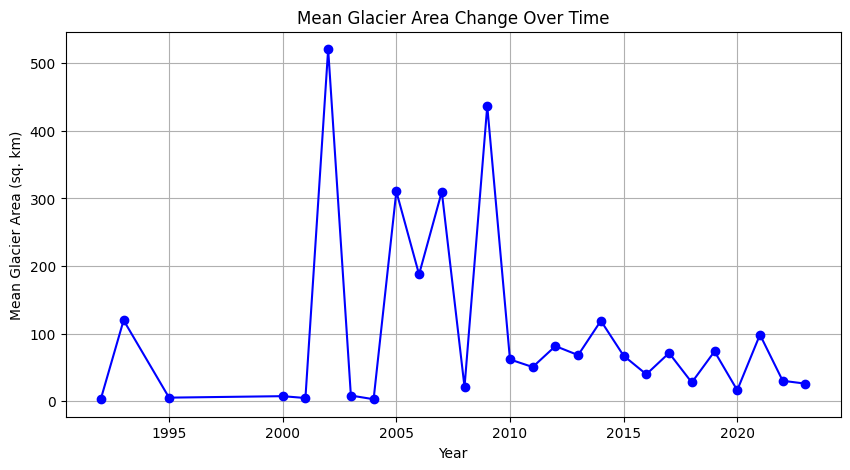

In [ ]:
mean_area_over_time = dataset.groupby('year')['db_area'].mean()

plt.figure(figsize=(10, 5))
plt.plot(mean_area_over_time.index, mean_area_over_time.values, marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel("Mean Glacier Area (sq. km)")
plt.title("Mean Glacier Area Change Over Time")
plt.grid(True)

plt.show()

In [ ]:
len(dataset[dataset['db_area'] == 0])

609

In [ ]:
len(dataset[(dataset['db_area'] == 0) & (dataset['glac_stat'] != 'gone')])

609

In [ ]:
len(dataset[(dataset['db_area'] == 0) & (dataset['glac_stat'] == 'gone')])

0

In [ ]:
dataset[dataset['glac_stat'] == 'gone']

,system:index,anlys_time,area,conn_lvl,db_area,geog_area,glac_stat,glob_unc_x,glob_unc_y,gtng_o1reg,...,primeclass,proc_desc,rec_status,release_dt,src_date,surge_type,term_type,width,.geo,year
0,000000000000000002df,2016-09-01,0.000000,0,0.039315,French Alps,gone,80.0,80.0,11,...,0,; The glacier inventory was developed from ort...,okay,2016-07-05T09:00:00,1967-01-01T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.351093133...",2016
7,00000000000000000323,2016-09-01,0.000000,0,0.059239,French Alps,gone,80.0,80.0,11,...,0,; The glacier inventory was developed from ort...,okay,2016-07-05T09:00:00,1967-01-01T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.334616765...",2016
15,00000000000000000309,2016-09-01,0.000000,0,0.071962,French Alps,gone,80.0,80.0,11,...,0,; The glacier inventory was developed from ort...,okay,2016-07-05T09:00:00,1970-01-01T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.340685591...",2016
17,0000000000000000030d,2016-09-01,0.000000,0,0.074833,French Alps,gone,80.0,80.0,11,...,0,; The glacier inventory was developed from ort...,okay,2016-07-05T09:00:00,1970-01-01T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.407144060...",2016
20,00000000000000000312,2016-09-01,0.000000,0,0.147722,French Alps,gone,80.0,80.0,11,...,0,; The glacier inventory was developed from ort...,okay,2016-07-05T09:00:00,1970-01-01T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[6.234037270...",2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668587,0017000000000000346a,2018-04-01,5.436820,0,5.440440,Canada,gone,80.0,80.0,3,...,0,Manual glacier digitization.; Outlines for gla...,okay,2019-04-23T09:00:00,1999-07-23T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[-64.2770274...",2018
668588,00170000000000003e26,2021-08-01,2.168100,0,2.163180,Various (GlobGlacier),gone,80.0,80.0,3,...,0,Semi-automated glacier classification.;,okay,2021-09-03T09:00:00,1999-07-23T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[-64.4813612...",2021
668589,00170000000000001dcc,2021-08-01,5.445000,0,5.440450,Various (GlobGlacier),gone,80.0,80.0,3,...,0,Semi-automated glacier classification.;,okay,2021-09-03T09:00:00,1999-07-23T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[-64.2770274...",2021
674979,00170000000000003c39,2018-04-01,0.213072,0,0.213215,Canada,gone,80.0,80.0,3,...,0,Manual glacier digitization.; Outlines for gla...,okay,2019-04-23T09:00:00,2015-08-14T00:00:00,0,9,0.0,"{""type"":""Polygon"",""coordinates"":[[[-64.4189028...",2018


# Outlier detection

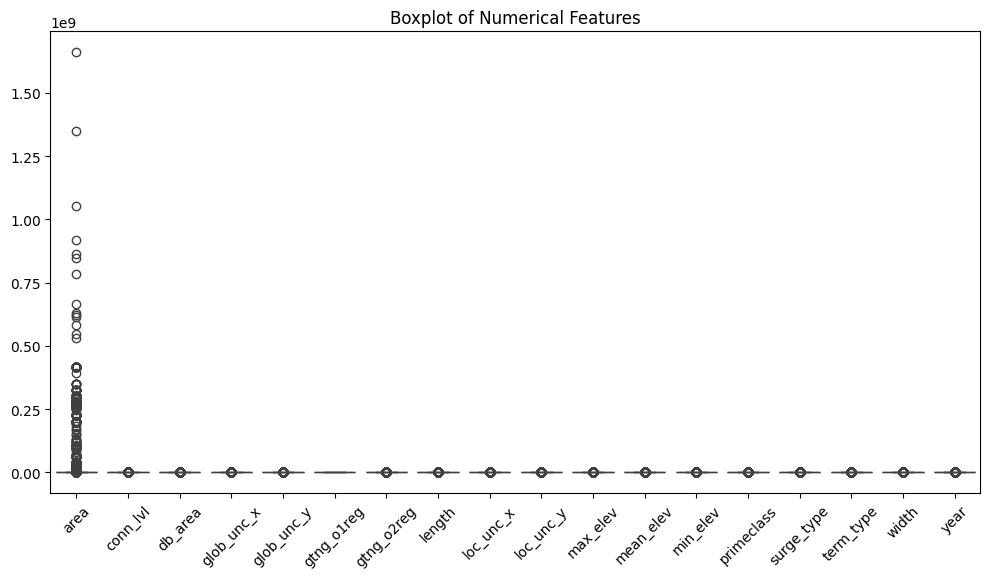

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

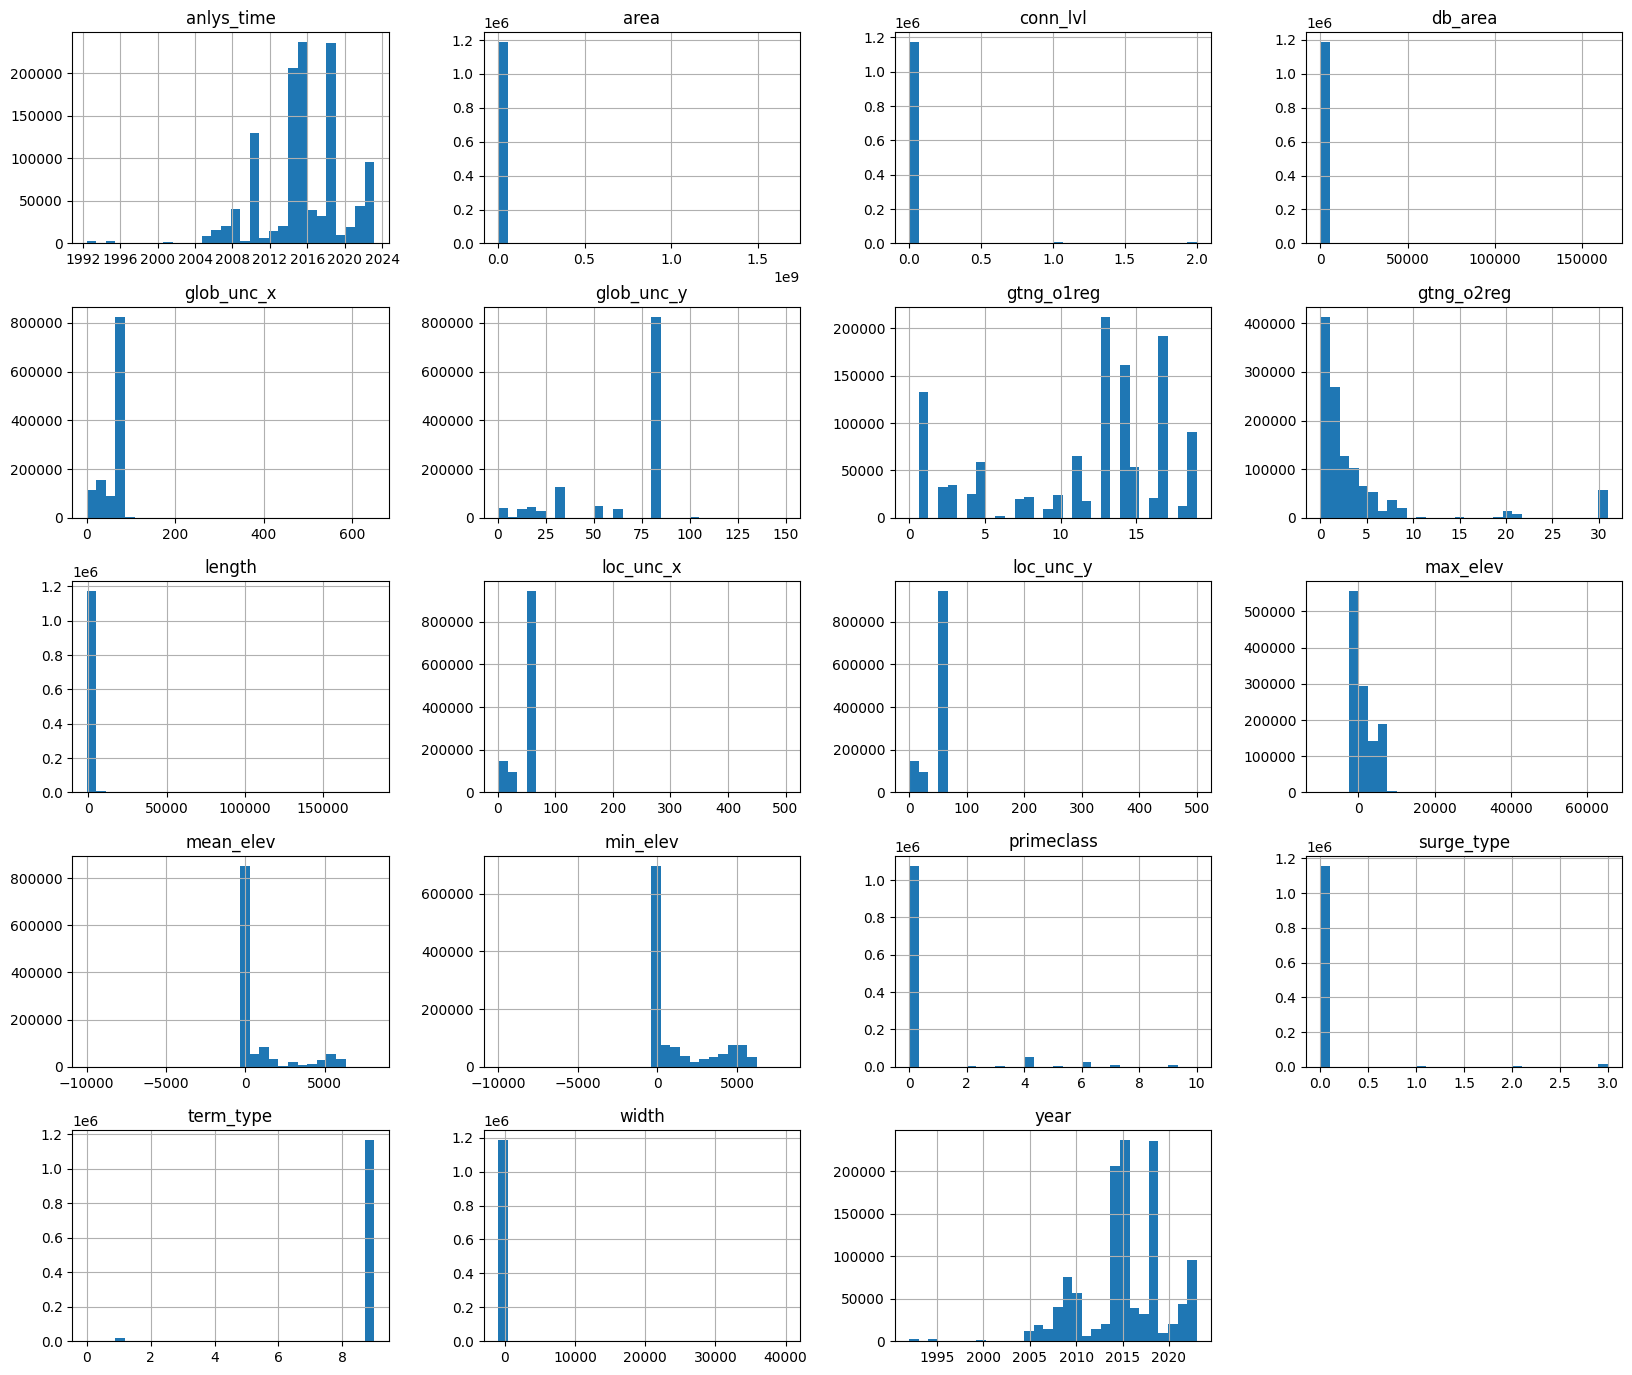

In [ ]:
# Histogram for data distribution
dataset.hist(figsize=(20, 17), bins=30)
plt.show()

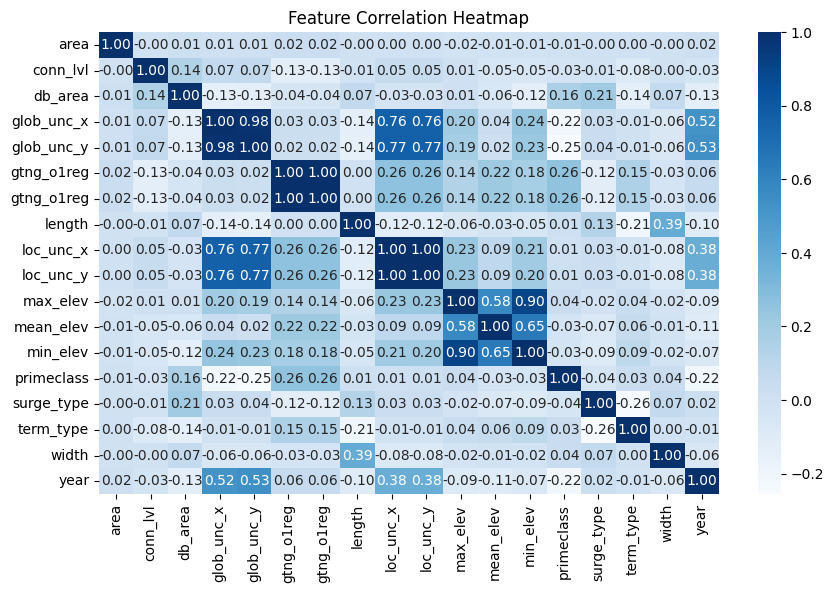

In [ ]:
# Correlation heatmap
numerical_features=['area','conn_lvl','db_area','glob_unc_x', 'glob_unc_y', 'gtng_o1reg', 'gtng_o1reg', 'length', 'loc_unc_x', 'loc_unc_y', 'max_elev', 'mean_elev', 'min_elev', 'primeclass', 'surge_type', 'term_type', 'width', 'year']
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_features].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
